### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [232]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [233]:
lista_alumnos = [("Caranchoa", 24, 1.82), 
                 ("Leo Messi", 25, 1.71), 
                 ("El bicho", 35, 1.66), 
                 ("Paquirrin", 37, 1.63), 
                 ("John Cobra", 29, 1.90), 
                 ("El tomate", 27, 1.80), 
                 ("El chucky de cieza", 28, 1.70), 
                 ("Chiquito de la Calzada", 32, 1.60), 
                 ("El cuñao", 36, 1.74), 
                 ("Rafa Nadal", 45, 1.72), 
                 ("Pau Gasol", 41, 1.65), 
                 ("El hermano de Pau Gasol", 30, 1.65), 
                 ("Joselito", 40, 1.60), 
                 ("Maria Isabel", 39, 1.80), 
                 ("Melody", 23, 1.77), 
                 ("Las ketchup", 32, 1.75), 
                 ("Pumuki", 27, 1.70), 
                 ("Naranjito", 34, 1.80), 
                 ("Espinete", 27, 1.77), 
                 ("El Feli", 28, 1.70), 
                 ("Jose Luis", 35, 1.80)] 

In [234]:
# Crea el siguiente DataFrame
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Estatura"])
df

,Nombre,Edad,Estatura
0,Caranchoa,24,1.82
1,Leo Messi,25,1.71
2,El bicho,35,1.66
3,Paquirrin,37,1.63
4,John Cobra,29,1.90
5,El tomate,27,1.80
6,El chucky de cieza,28,1.70
7,Chiquito de la Calzada,32,1.60
8,El cuñao,36,1.74
9,Rafa Nadal,45,1.72


In [235]:
# Muestra la info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nombre    21 non-null     object 
 1   Edad      21 non-null     int64  
 2   Estatura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [236]:
# Muestra los estadísticos del df
df.describe()

,Edad,Estatura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


<Axes: xlabel='Edad', ylabel='Estatura'>

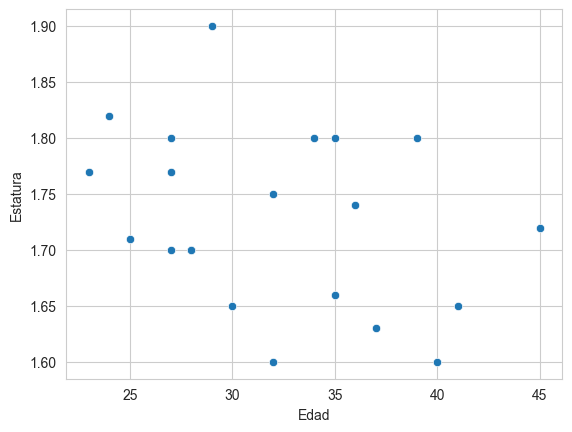

In [237]:
# Genera un scatter plot con Edad y Altura
sns.scatterplot(x=df['Edad'], y=df['Estatura'])

<Axes: >

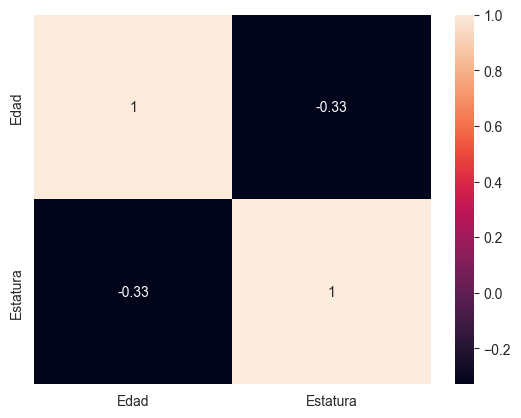

In [ ]:
# Genera un heatmap
sns.heatmap(df.iloc[:, 1:].corr(), annot=True)  # la correlacion es la pendiente de la curva 

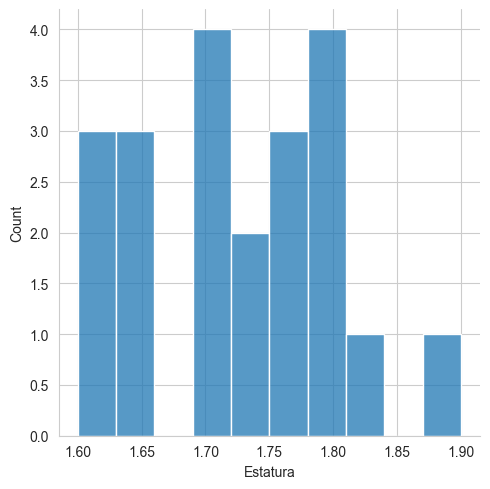

In [280]:
# Genera un distplot
sns.displot(df['Estatura'], bins=10);

In [240]:
# Genera un distplot

In [281]:
# Divide el df en features (X) y target (y)
x = df[["Edad"]]
y = df["Estatura"]
print(x.shape)
print(y.shape)

(21, 1)
(21,)


In [242]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjunto de entrenamiento y test
# Siendo el tamaño del conjunto test un 30% y la semilla sea 42
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.3,
    random_state=42)

In [243]:
# Muestra el tamaño de X, X_train, y_train, X_test e y_test
print("Total features shape:", x.shape)
print("Train features shape:", x_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14,)
Test features shape: (7, 1)
Test target shape: (7,)


In [244]:
# Instancia y entrena un regresor lineal

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [245]:
# imprime el intercepto y el coeficiente
c = lm.intercept_
m = lm.coef_
print(lm.intercept_)
print(lm.coef_)

1.8520906282183314
[-0.00414006]


(Altura) = 1.85 - 0.0041*(Edad)

In [246]:
# Realiza una predicción con el conjunto de test
predictions = lm.predict(x_test)
predictions

array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

In [247]:
# Crea un df con el conjunto de test
df_test = pd.DataFrame(x_test)
# Añade una columna con la predicción
df_test['predictions'] = predictions
df_test

,Edad,predictions
0,24,1.752729
17,34,1.711329
15,32,1.719609
1,25,1.748589
8,36,1.703048
5,27,1.740309
11,30,1.727889


In [282]:
# Añade una columna con la altura real
df_test['real_height'] = y_test.copy()

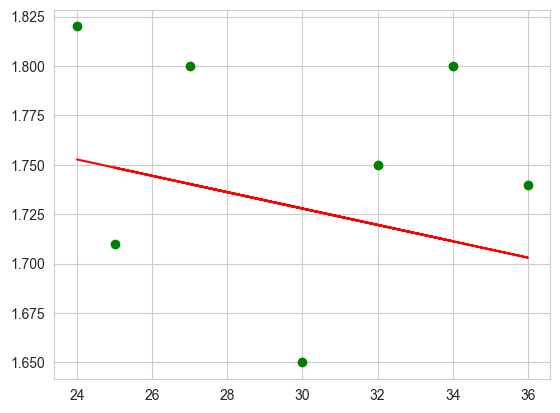

In [249]:
# Crea un plot con los datos reales y la predicción
plt.scatter(df_test["Edad"], df_test["real_height"], label="Real Height", color="green", marker="o")

# Gráfico de línea para predictions (color rojo)
plt.plot(df_test["Edad"], df_test["predictions"], label="Predictions", color="red", linestyle="-")

In [250]:
lm

LinearRegression()

In [ ]:
# Muestra el score del módelo   ----> En este caso el Score es el R2, pero a veces nos podemos confundir, mejor hacer el R2 directamente. 
from sklearn import metrics

lm.score(x_test, y_test)

# Score del profe: 0.0977354475123352

-0.19742015635643928

In [ ]:
# Muestra el score del módelo 
lm.score(x_test, y_test)

In [252]:
df_test

,Edad,predictions,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


In [253]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Muestra el Mean Absolute Error, el Mean Squared Error y el Root Mean Squared Error
print('R2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # cuanto mas distinto sea del RMSE, mas errores groseros tengo, mas desviacion estandar.
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

R2: -0.19742015635643928
MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306
MAPE: 0.03253724207144201


In [284]:
# Muestra cual sería la predicción para 85 años de edad
nuevo = np.array([[85]])
lm.predict(nuevo)  # lm.predict([[85]])

c:\Users\emita\.conda\envs\data_analisis_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.50018538])

In [255]:
MAE = (1/len(y_test))* sum(np.abs(df_test['real_height']-df_test['predictions']))
MAE

0.05706488156539665

In [256]:
MSE = (1/len(y_test))* sum((df_test['real_height']-df_test['predictions'])**2)
MSE

0.0036851216240520682

In [257]:
RMSE = np.sqrt(MSE)
RMSE

np.float64(0.060705202611078306)

In [258]:
MAPE = (1/len(y_test))* sum(np.abs((df_test['real_height']-df_test['predictions'])/df_test['real_height']))
MAPE

0.03253724207144201

In [259]:
# Añade una columna con el error
df_test['error']= np.abs(df_test['real_height'] - df_test['predictions'])
df_test

,Edad,predictions,real_height,error
0,24,1.752729,1.82,0.067271
17,34,1.711329,1.80,0.088671
15,32,1.719609,1.75,0.030391
1,25,1.748589,1.71,0.038589
8,36,1.703048,1.74,0.036952
5,27,1.740309,1.80,0.059691
11,30,1.727889,1.65,0.077889


In [285]:
# Muestra el error medio
df_test['error'].mean()

np.float64(0.05706488156539665)

In [ ]:
# Añade una columna que contenga el error cuadrático
df_test['error_cuadratico']= (df_test['error'])**2
df_test

,Edad,predictions,real_height,error,error_cuadratico
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,0.077889,0.006067


In [269]:
error_cm = df_test['error_cuadratico'].mean()
error_cm

np.float64(0.0036851216240520687)

In [271]:
# Muestra la raíz del error cuadrático medio
np.sqrt(error_cm)

np.float64(0.060705202611078306)

In [277]:
# Muestra el error absoluto medio porcentual
mape = (np.abs(df_test['error']) / df_test['real_height']).mean()
mape

np.float64(0.03253724207144201)